# Maximum Stress Criterion

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing()
import ipywidgets as ipw

<img src="farfieldstress.png" width="500"/>

The figure above shows stresses in the vicinity of crack tip. $\theta$ depicts crack propagation angle and $r$ represents the radius of fracture propagation segment.

In [2]:
r = sp.Symbol('r', nonnegative = True)
theta = sp.Symbol(r'\theta', nonnegative = True)
K_I = sp.Symbol('K_I', nonnegative = True)
K_II = sp.Symbol('K_{II}', nonnegative = True)
T = sp.Symbol('T', nonnegative = True)
sigma_x =  sp.Symbol(r'\sigma_x', nonnegative = True)
eta =  sp.Symbol(r'\eta', nonnegative = True)
sigma_z =  sp.Symbol(r'\sigma_z', nonnegative = True)
tau_fps = sp.Symbol(r'\tau_\mathrm{fps}')
a = sp.Symbol('a', nonnegative = True)
beta = sp.Symbol(r'\beta', nonnegative = True)
f = sp.Symbol(r'f', nonnegative = True)
eta

## Stress Intensity Factors
In this section, the far field stresses will be represented in terms of Stress Intensity factors. The schematics assume that we have a far field stress in the horizontal direction represented as $\sigma_x$ with respect to an angled crack represent by angle $\beta$ with respect to this horizontal boundary condition.The stress field in this case will be given as:
\begin{align}
\sigma_{ij} = 
\left[
\begin{array}{cc}
(1 - \eta)\sigma_{X} & \eta \sigma_{X} \\
\eta \sigma_{X} & 0
\end{array}
\right]
\end{align}
and the rotated stress field depicted in figure below is shown as:
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right]
\end{align}
However, to transform the global stress field into local with respect to the angle $\beta$ can be done with the help of rotation matrix. Hence,
\begin{align}
R_{\beta} = 
\left[
\begin{array}{cc}
\cos \beta & -\sin \beta \\
\sin \beta & \cos \beta
\end{array}
\right]
\end{align}
\begin{align}
\sigma^{\beta}_{ij} = 
\left[
\begin{array}{cc}
\sigma_{n} & \sigma_{np} \\
\sigma_{np} & \sigma_{p}
\end{array}
\right] = 
R_{\beta}^T \sigma_{ij} R_{\beta}
\end{align}
In order to convert the local stress field into SIF's to take into account crack length: 
\begin{gather*}
K_I = \sqrt{\pi a} \sigma_{n}\\
K_{II} = \sqrt{\pi a} \sigma_{np}
\end{gather*}
Here, $K_I$ represents the mode I opening failure whereas, $K_{II}$ depicts the sliding failure. The positive sign of $K_I$ highlights stress as tension where negative sign shows compression. Similarly, negative sign of $K_{II}$ represents stress in opposite direction. In the case of pure mode I failure, $\beta$ is $90°$ whereas for failure along pure mode II $\beta = 0°$

<img src="transformationofstressfield.png" width="300"/>

In [3]:
s_b, c_b = sp.symbols('s_b, c_b')
s_b

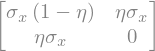

In [4]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

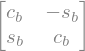

In [5]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

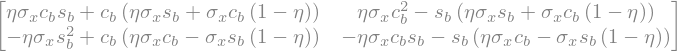

In [6]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

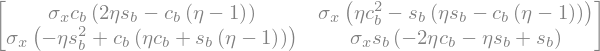

In [7]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [8]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [9]:
#a = sp.simplify(SIF_field)
#l = (Rot.T).inv() * a * Rot.inv()
#l

In [10]:
#sp.simplify(l)

In [11]:
#params1 = {beta:45*np.pi/180}

In [12]:
#K_I_ = K_I#.subs(params)
#K_II_ = K_II#.subs(params)
#K_I_, K_II_

In [13]:
## Representation of sin and cos components as s_t and c_t for simplicity.
s_t, c_t = sp.symbols('s_t,c_t')
#T_t = sp.Matrix([[c_t, -s_t],[s_t, c_t]])
#T_t

In [14]:
cs_theta = sp.Matrix([c_t, s_t])
cs_theta

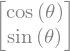

In [15]:
cs_theta_ = sp.Matrix([sp.cos(theta), sp.sin(theta)])
cs_theta_

## Stress at the Crack tip
Dominant term for stresses can be obtained as:
\begin{gather*}
\sigma^{tip}_{ij} = \frac{\left[ K_I S_{ij}^I(\theta) + K_{II} S_{ij}^{II}(\theta) \right]}{\sqrt{2\pi r}} = 
\left[
\begin{array}{cc}
\sigma_{x} & \sigma_{xy} \\
\sigma_{xy} &  \sigma_{y}
\end{array}
\right]
\end{gather*}
where $K_I$, $K_{II}$ represents the Stress Intensity Factors for Mode I and Mode II failures and $S^I_{ij}(\theta)$ , $S_{ij}^{II}(\theta)$ depicts the Angular functions for Mode I and Mode II which are given as:
Angular functions for Mode I:
\begin{align}
S^{I} = 
\left[
\begin{array}{cc}
S^{I}_{11} & S^{I}_{12} \\
S^{I}_{12} &  S^{I}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
2 \cos\frac{\theta}{2} -\cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] & \cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} \\
\cos\frac{\theta}{2}\sin\frac{\theta}{2}\cos\frac{3\theta}{2} &  \cos\frac{\theta}{2} \left[ 1 + \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right]
\end{array}
\right] 
\end{align}
Angular functions for Mode II:
\begin{align}
S^{II} = 
\left[
\begin{array}{cc}
S^{II}_{11} & S^{II}_{12} \\
S^{II}_{12} &  S^{II}_{22}
\end{array}
\right] =
\left[
\begin{array}{cc}
-2 \sin\frac{\theta}{2} - \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2} & \cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] \\
\cos\frac{\theta}{2}\left[ 1 - \sin\frac{\theta}{2}\sin\frac{3\theta}{2}\right] &  \sin\frac{\theta}{2}\cos\frac{\theta}{2}\cos\frac{3\theta}{2}
\end{array}
\right] 
\end{align}

<img src="Transformationfigure.png" width="500"/>

## Angular Function

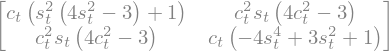

In [16]:
s_3t = 3 * s_t - 4 * s_t**3
c_3t = 4 * c_t**3 - 3 * c_t
S_I_11 = 2 * c_t - c_t * (1 + s_t * s_3t) 
S_I_22 = c_t * (1 + s_t * s_3t)
S_I_12 = c_t * s_t * c_3t
S_I = sp.Matrix([[S_I_11, S_I_12],[S_I_12, S_I_22]])
S_I_ = sp.simplify(S_I)
S_I_

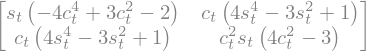

In [17]:
S_II_11 = - 2 * s_t - s_t * c_t * c_3t  
S_II_22 = s_t * c_t * c_3t
S_II_12 = c_t * (1 - s_t * s_3t)
S_II = sp.Matrix([[S_II_11, S_II_12],[S_II_12, S_II_22]])
S_II_ = sp.simplify(S_II)
S_II_

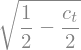

In [18]:
c_t_h = sp.sqrt((1 + c_t)/2)
s_t_h = sp.sqrt((1 - c_t)/2)
s_t_h

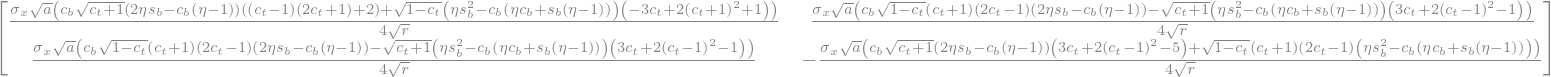

In [19]:
sigma_tip_ij = sp.Matrix([[K_I * S_I_[0,0] + K_II * S_II_[0,0], K_I * S_I_[0,1] + K_II * S_II_[0,1]],
                   [K_I * S_I_[0,1] + K_II * S_II_[0,1], K_I * S_I_[1,1] + K_II * S_II_[1,1]]])
sigma_tip_ij_ = sp.simplify(sigma_tip_ij.subs(c_t, c_t_h).subs(s_t, s_t_h)) / sp.sqrt(2 * sp.pi * r)
sigma_tip_ij_

## Tip Stress Transformation
To transform from cartesian to polar coordinates, Transformation Matrix will be taken into account i.e.:
\begin{align}
R_{\theta} = 
\left[
\begin{array}{cc}
\cos \theta & -\sin \theta \\
\sin \theta &  \cos \theta
\end{array} \right]
\end{align}
Now, in order to transform from cartesian to polar the following transformation will be done. i.e.:
\begin{align}
\sigma^{tip(\theta)}_{ij} = R_{\theta}^T \sigma^{tip}_{ij} R_{\theta} =
\left[
\begin{array}{cc}
\sigma_{\rho} & \sigma_{\rho \theta} \\
\sigma_{\rho \theta} &  \sigma_{\theta}
\end{array} \right]
\end{align}

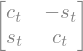

In [20]:
R_theta = sp.Matrix([[cs_theta[0], -cs_theta[1]],[cs_theta[1], cs_theta[0]]])
R_theta

In [21]:
sig_tip_theta_ij = R_theta.T * sigma_tip_ij_ * R_theta
sig_tip_theta_ij_ = sp.simplify(sig_tip_theta_ij)
sig_tip_theta_ij_;

Replacing sine component with cosine for transforming the equation into a single trignometric ratio for simpicity.

In [22]:
s_t_ = sp.sqrt(1 - c_t**2)
sig_tip_theta_ij_sub = sig_tip_theta_ij_.subs(s_t, s_t_)
sig_tip_theta_ij_sub;

In [23]:
sig_tip_theta_ij_sim = sp.simplify(sig_tip_theta_ij_sub)
sig_tip_theta_ij_sim;

Solving the stress field to calculate angle $\theta$ following the Maximum Tangential Stress Theory. According to the Maximum Tangental Stress Theory, when the stress $\sigma_{\theta}$ is maximum depicting principal stress than $\sigma_{\rho \theta}$ becomes:  
\begin{gather*}
\sigma_{\rho \theta} = 0
\end{gather*}

In [24]:
#sig_tip_theta_sim[1,0].subs(params)

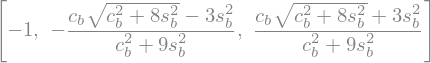

In [26]:
params = {eta : 0}
theta_sigma_tension = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params), c_t)
theta_sigma_tension

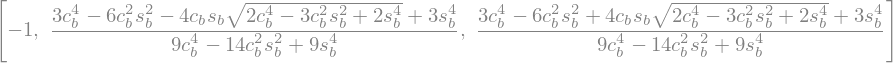

In [27]:
params_ = {eta : 1} 
theta_sigma_pure_shear = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
theta_sigma_pure_shear

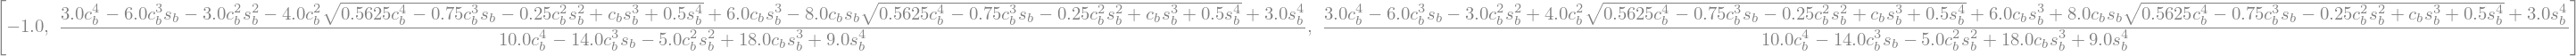

In [28]:
params_ = {eta : 0.5} 
theta_sigma_tension_shear = sp.solve(sig_tip_theta_ij_sim[1,0].subs(params_), c_t)
theta_sigma_tension_shear

In [29]:
theta_pure_tension = theta_sigma_tension[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_pt = sp.acos(theta_pure_tension)
get_theta_sig_pt = sp.lambdify((beta), theta_pt, 'numpy')
get_theta_sig_pt

<function _lambdifygenerated(Dummy_210)>

In [30]:
theta_pure_shear = theta_sigma_pure_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ps = sp.acos(theta_pure_shear)
get_theta_sig_ps = sp.lambdify((beta), theta_sig_ps, 'numpy')
get_theta_sig_ps

<function _lambdifygenerated(Dummy_211)>

In [31]:
theta_sig_tension_shear = theta_sigma_tension_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ts = sp.acos(theta_sig_tension_shear)
get_theta_sig_ts = sp.lambdify((beta), theta_sig_ts, 'numpy')
get_theta_sig_ts

<function _lambdifygenerated(Dummy_212)>

<IPython.core.display.Javascript object>


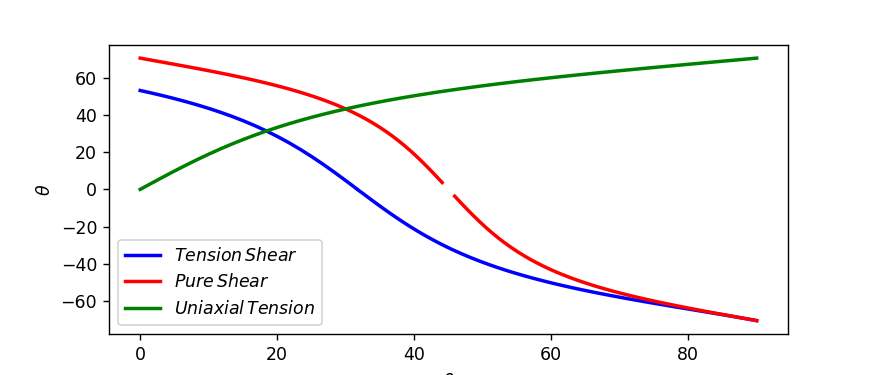

In [35]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
beta_0_ts = np.linspace(0 * np.pi/180, 31.70 * np.pi/180, 20)
beta_1_ts = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_0_ts, beta_1_ts  ))
theta_sig_pt_r = get_theta_sig_pt(beta_ts)
beta_0_ps = np.linspace(0 * np.pi/180, 45 * np.pi/180, 50)
beta_1_ps = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_0_ps, beta_1_ps))
theta_sig_ps_1 = get_theta_sig_ps(beta_0_ps)
theta_sig_ps_2 = -get_theta_sig_ps(beta_1_ps)
#if beta_ps.any() == 45 * np.pi/180:
#theta_ps_0 = 0
theta_sig_ps_fin = np.concatenate((theta_sig_ps_1, theta_sig_ps_2)) #, theta_ps_0
theta_ts_1 = get_theta_sig_ts(beta_0_ts)
theta_ts_2 = -get_theta_sig_ts(beta_1_ts)
theta_sig_ts_fin = np.concatenate((theta_ts_1, theta_ts_2))
ax1.plot(beta_ts * 180/np.pi, theta_sig_ts_fin * 180/ np.pi, color='blue', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ps * 180/np.pi, theta_sig_ps_fin * 180/ np.pi, color='red', lw=2, label = r'$Pure\,Shear$')
ax1.plot(beta_ts * 180/np.pi, theta_sig_pt_r  * 180/ np.pi, color='green', lw=2, label = r'$Uniaxial\,Tension$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("crackpropagationagainstinclination.pdf", bbox_inches='tight')

In [36]:
theta_sig_ts_fin * 180/ np.pi

array([ 5.31301024e+01,  5.17600938e+01,  5.03128291e+01,  4.87773443e+01,
        4.71413491e+01,  4.53910634e+01,  4.35110758e+01,  4.14842534e+01,
        3.92917519e+01,  3.69132030e+01,  3.43271893e+01,  3.15121623e+01,
        2.84479924e+01,  2.51183457e+01,  2.15140030e+01,  1.76370073e+01,
        1.35050880e+01,  9.15521997e+00,  4.64470614e+00,  4.82980686e-02,
       -4.82980686e-02, -1.99023712e+00, -4.02140171e+00, -6.03782797e+00,
       -8.03250602e+00, -9.99893771e+00, -1.19312610e+01, -1.38243403e+01,
       -1.56738204e+01, -1.74761465e+01, -1.92285538e+01, -2.09290311e+01,
       -2.25762657e+01, -2.41695752e+01, -2.57088324e+01, -2.71943861e+01,
       -2.86269854e+01, -3.00077055e+01, -3.13378815e+01, -3.26190479e+01,
       -3.38528860e+01, -3.50411784e+01, -3.61857710e+01, -3.72885416e+01,
       -3.83513733e+01, -3.93761348e+01, -4.03646636e+01, -4.13187540e+01,
       -4.22401479e+01, -4.31305283e+01, -4.39915150e+01, -4.48246621e+01,
       -4.56314569e+01, -

In [37]:
beta_ts * 180/np.pi

array([ 0.        ,  1.66842105,  3.33684211,  5.00526316,  6.67368421,
        8.34210526, 10.01052632, 11.67894737, 13.34736842, 15.01578947,
       16.68421053, 18.35263158, 20.02105263, 21.68947368, 23.35789474,
       25.02631579, 26.69473684, 28.36315789, 30.03157895, 31.7       ,
       31.7       , 32.43797468, 33.17594937, 33.91392405, 34.65189873,
       35.38987342, 36.1278481 , 36.86582278, 37.60379747, 38.34177215,
       39.07974684, 39.81772152, 40.5556962 , 41.29367089, 42.03164557,
       42.76962025, 43.50759494, 44.24556962, 44.9835443 , 45.72151899,
       46.45949367, 47.19746835, 47.93544304, 48.67341772, 49.41139241,
       50.14936709, 50.88734177, 51.62531646, 52.36329114, 53.10126582,
       53.83924051, 54.57721519, 55.31518987, 56.05316456, 56.79113924,
       57.52911392, 58.26708861, 59.00506329, 59.74303797, 60.48101266,
       61.21898734, 61.95696203, 62.69493671, 63.43291139, 64.17088608,
       64.90886076, 65.64683544, 66.38481013, 67.12278481, 67.86

In [38]:
a_ = 2
H_ = 60
H_crack = 20
V_crack = 0
i = 0
beta_ = 0 
coordinates = np.zeros((1,2))
coordinates = coordinates[np.newaxis,:,:]
for i in range(40):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates = np.concatenate((coordinates,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0.39:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_ts(beta_)
    elif beta_ > 0.39:
        beta_ += -get_theta_sig_ts(beta_)
    
    
        
    #print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    
    if abs(V_crack) > H_ or H_crack > 200:# or i>15:
        break
#print(coordinates)

In [39]:
L_, H_, B_ = 60, 60, 20
x_aC = np.array([[0, L_, L_, 0, 0], 
                 [0, 0, H_, H_, 0]], dtype=np.float_)
x_Ca = x_aC.T
x_Ca

array([[ 0.,  0.],
       [60.,  0.],
       [60., 60.],
       [ 0., 60.],
       [ 0.,  0.]])

<IPython.core.display.Javascript object>


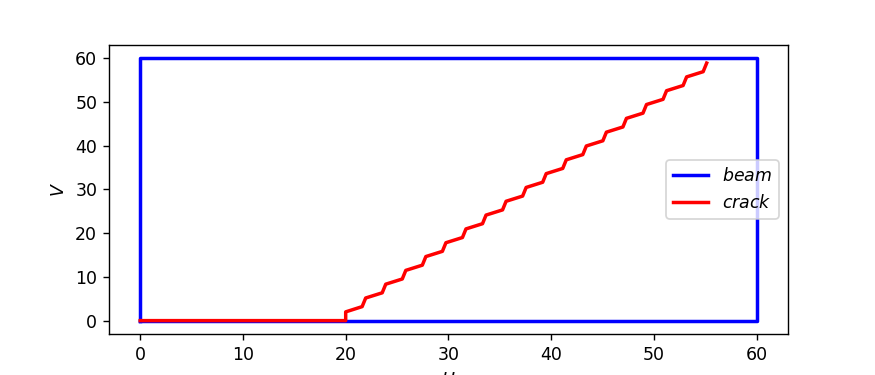

In [40]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates[:,:,0], coordinates[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotnew1.pdf", bbox_inches='tight')

In [55]:
a_ = 1
H_ = 60
H_crack = 0
V_crack = 0
i = 0
beta_ = 0 
coordinates = np.zeros((1,2))
coordinates = coordinates[np.newaxis,:,:]
for i in range(140):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates = np.concatenate((coordinates,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0.39:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_ps(beta_)
    elif beta_ > 0.39:
        beta_ += -get_theta_sig_ps(beta_)
    
    
        
    #print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    
    if abs(V_crack) > H_ or H_crack > 60:# or i>15:
        break
#print(coordinates)

<IPython.core.display.Javascript object>


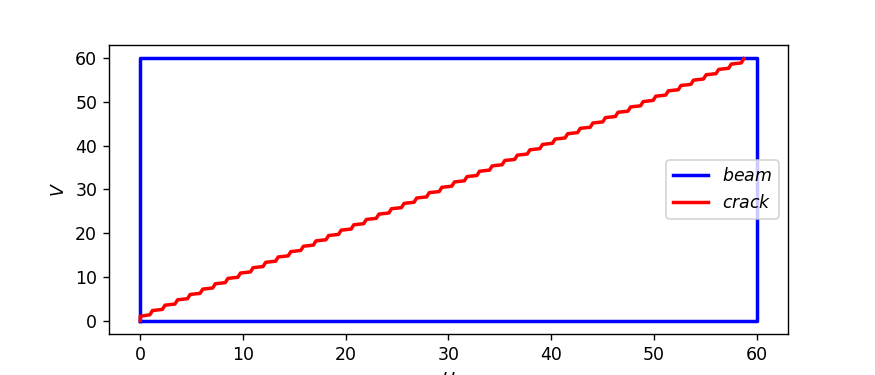

In [56]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates[:,:,0], coordinates[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
_.savefig("crackplotshear.pdf", bbox_inches='tight')

In [43]:
a_ = 2
H_ = 60
H_crack = 20
V_crack = 0
i = 0
beta_ = 0 
coordinates = np.zeros((1,2))
coordinates = coordinates[np.newaxis,:,:]
for i in range(40):
    new_coord = np.array([H_crack,V_crack]).reshape(1,2)
    new_coord = new_coord[np.newaxis,:,:]
    coordinates = np.concatenate((coordinates,new_coord))
    V_crack += (a_ * np.cos(beta_))
    H_crack += (a_ * np.sin(beta_))
    if beta_ < 0.39:
        #beta_ += get_theta_sig_xy02(beta_)
        beta_ += +get_theta_sig_pt(beta_)
    elif beta_ > 0.39:
        beta_ += -get_theta_sig_pt(beta_)
    
    
        
    #print(beta_* 180/np.pi)
    #print(V_crack)
    #print(H_crack)
    #print("**********************")
    i += 1
    #print(i)
    
    if abs(V_crack) > H_ or H_crack > 200:# or i>15:
        break
#print(coordinates)

<IPython.core.display.Javascript object>


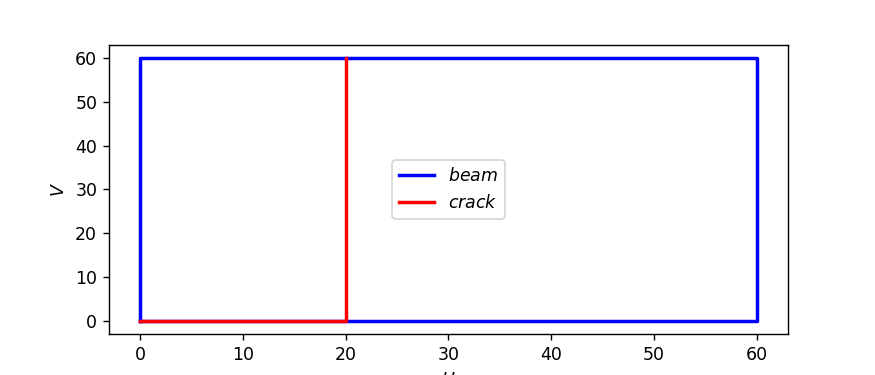

In [44]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
ax1.plot(x_Ca[:,0], x_Ca[:,1], color='blue', lw=2, label = r'$beam$')
ax1.plot(coordinates[:,:,0], coordinates[:,:,1], color='red', lw=2, label = r'$crack$')
ax1.set_xlabel(r'$H$'); ax1.set_ylabel(r'$V$')
ax1.legend()
#_.savefig("crackplotnew1.pdf", bbox_inches='tight')

In [159]:
#sigma_rr = sigma_tip_ij_[0,0].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta)).subs(c_t, sp.cos(theta))
#sigma_rr 

In [160]:
#p = {eta:0, a:1}
#sigma_rr_p = sigma_rr.subs(p)
#sigma_rr_p

In [161]:
#get_sigma_rr = sp.lambdify((sigma_x, r, theta, beta), sigma_rr_p, 'numpy')
#get_sigma_rr

In [162]:
#_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
#beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 3)
#theta_ = (0, 50.83 * np.pi/180, 70.5 * np.pi/180)
#r_ = np.linspace(0, 4, 10)
#sigma_x_ = 1
#sig_rr = get_sigma_rr(sigma_x_,r_, theta_[0], beta_0[0])
#sig_rr_1 = get_sigma_rr(sigma_x_,r_, theta_[1], beta_0[1])
#sig_rr_2 = get_sigma_rr(sigma_x_,r_, theta_[2], beta_0[2])
#ax1.plot(r_, sig_rr, color='blue', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
#ax1.plot(r_, sig_rr_1, color='red', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
#ax1.plot(r_, sig_rr_2, color='green', lw=2, label = r'$\eta = 0.5, \sigma_X = 1$')
#ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$\sigma_{\theta \theta}$')
#ax1.legend()

In [61]:
#import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#beta_0 = np.linspace(0 * np.pi/180, 90 * np.pi/180, 3)
#theta_ = get_theta_sig_xy0(beta_0[0])
#r_ = np.linspace(0, 4, 3)
#sig_rr = get_sigma_rr(sigma_x_,r_, theta_, beta_0[0])
#sig_rr_ = get_sigma_rr(sigma_x_,r_, theta_, beta_0[1])
#sig_rr_1 = get_sigma_rr(sigma_x_,r_, theta_, beta_0[2])
#ax.plot3D(r_, beta_0*180/np.pi, sig_rr)
#ax.plot3D(r_, beta_0*180/np.pi, sig_rr_)
#ax.plot3D(r_, beta_0*180/np.pi, sig_rr_1)

## Mixity Parameter

Mode mixity is given as: 
\begin{gather*}
    M_e = \left|\frac{2}{\pi} \arctan \left(\frac{K_I}{K_{II}} \right)\right|
\end{gather*}
where $M_e = 0$ depicts the pure mode II failure and $M_e = 1$ highlights a pure mode I failure.

In [62]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', Znonnegative = True)

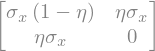

In [63]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma_x, eta * sigma_x], #eta * sigma_x
                      [eta * sigma_x, 0]])
sigma_ij

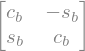

In [64]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

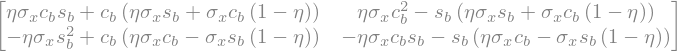

In [65]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

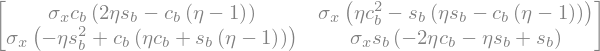

In [66]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [67]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

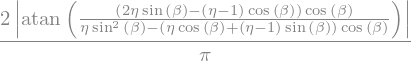

In [88]:
M_e = (2 / sp.pi) * sp.atan(K_I/K_II)
M_e_ = sp.Abs(M_e.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
M_e_

In [89]:
get_M_e = sp.lambdify((eta, beta), M_e_, 'numpy')
get_M_e

<function _lambdifygenerated(Dummy_227, Dummy_228)>

In [72]:
theta_pure_tension = theta_sigma_tension[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_pt = sp.acos(theta_pure_tension)
get_theta_sig_pt = sp.lambdify((beta), theta_pt, 'numpy')
get_theta_sig_pt

<function _lambdifygenerated(Dummy_220)>

In [73]:
theta_pure_shear = theta_sigma_pure_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ps = sp.acos(theta_pure_shear)
get_theta_sig_ps = sp.lambdify((beta), theta_sig_ps, 'numpy')
get_theta_sig_ps

<function _lambdifygenerated(Dummy_221)>

In [74]:
theta_sig_tension_shear = theta_sigma_tension_shear[2].subs(c_b, sp.cos(beta)).subs(s_b, sp.sin(beta))
theta_sig_ts = sp.acos(theta_sig_tension_shear)
get_theta_sig_ts = sp.lambdify((beta), theta_sig_ts, 'numpy')
get_theta_sig_ts

<function _lambdifygenerated(Dummy_222)>

<IPython.core.display.Javascript object>


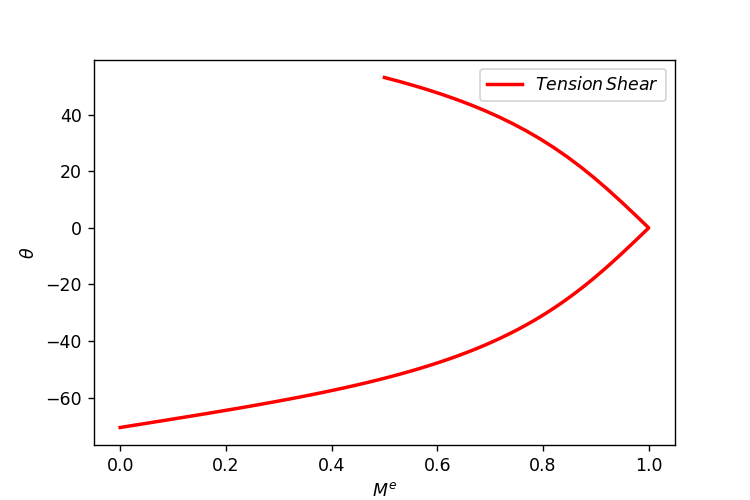

<string>:2: RuntimeWarning: invalid value encountered in arccos
<string>:2: RuntimeWarning: divide by zero encountered in true_divide


In [140]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
beta_ps1 = np.linspace(0, 45 * np.pi/180, 50)
beta_ps2 = np.linspace(45 * np.pi/180, 90 * np.pi/180, 50)
beta_ps = np.concatenate((beta_ps1, beta_ps2))
beta_ts1 = np.linspace(0, 31.70 * np.pi/180, 20)
beta_ts2 = np.linspace(31.70 * np.pi/180, 90 * np.pi/180, 80)
beta_ts = np.concatenate((beta_ts1, beta_ts2))
theta_sig_pt = get_theta_sig_pt(beta_)
theta_sig_ps1 = get_theta_sig_ps(beta_ps1)
theta_sig_ps2 = -get_theta_sig_ps(beta_ps2)
theta_sig_ps = np.concatenate((theta_sig_ps1, theta_sig_ps2))
theta_sig_ts1 = get_theta_sig_ts(beta_ts1)
theta_sig_ts2 = -get_theta_sig_ts(beta_ts2)
theta_sig_ts = np.concatenate((theta_sig_ts1, theta_sig_ts2))
M_e_pt = get_M_e(eta_0, beta_)
M_e_ts = get_M_e(eta_05, beta_ts)
M_e_ps = get_M_e(eta_1, beta_ps)
#ax1.plot(M_e_pt, theta_sig_pt * 180/ np.pi, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(M_e_ts, theta_sig_ts * 180/ np.pi, color='red', lw=2, label = r'$Tension\,Shear$')
#ax1.plot(M_e_ps, theta_sig_ps * 180/ np.pi, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$M^e$'); ax1.set_ylabel(r'$\theta$')
ax1.legend()
_.savefig("thetaMe.pdf", bbox_inches='tight')

In [103]:
theta_sig_ts * 180/ np.pi

array([ 5.31301024e+01,  5.17600938e+01,  5.03128291e+01,  4.87773443e+01,
        4.71413491e+01,  4.53910634e+01,  4.35110758e+01,  4.14842534e+01,
        3.92917519e+01,  3.69132030e+01,  3.43271893e+01,  3.15121623e+01,
        2.84479924e+01,  2.51183457e+01,  2.15140030e+01,  1.76370073e+01,
        1.35050880e+01,  9.15521997e+00,  4.64470614e+00,  4.82980686e-02,
       -4.82980686e-02, -1.99023712e+00, -4.02140171e+00, -6.03782797e+00,
       -8.03250602e+00, -9.99893771e+00, -1.19312610e+01, -1.38243403e+01,
       -1.56738204e+01, -1.74761465e+01, -1.92285538e+01, -2.09290311e+01,
       -2.25762657e+01, -2.41695752e+01, -2.57088324e+01, -2.71943861e+01,
       -2.86269854e+01, -3.00077055e+01, -3.13378815e+01, -3.26190479e+01,
       -3.38528860e+01, -3.50411784e+01, -3.61857710e+01, -3.72885416e+01,
       -3.83513733e+01, -3.93761348e+01, -4.03646636e+01, -4.13187540e+01,
       -4.22401479e+01, -4.31305283e+01, -4.39915150e+01, -4.48246621e+01,
       -4.56314569e+01, -

## Normalized Parameters

The critical mode I stress intensity factor is given as:
\begin{gather*}
    K_{Ic} = \sigma_X \sqrt{\pi a}
\end{gather*}
Now, the stress intensity factors will be normalized with respect to the $K_{Ic}$ to visualize the failure locus.

In [106]:
K_Ic = sigma_x * sp.sqrt( sp.pi * a)
K_Ic

In [107]:
beta = sp.Symbol(r'\beta', nonnegative = True)
eta = sp.Symbol(r'\eta', nonnegative = True)

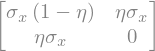

In [109]:
sigma_ij = sp.Matrix([[(1 - eta) * sigma_x, eta * sigma_x],
                    [ eta * sigma_x, 0]])
sigma_ij

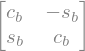

In [110]:
R_beta = sp.Matrix([[c_b, -s_b],
                    [s_b, c_b]])
R_beta

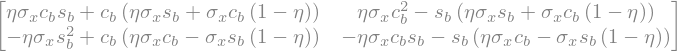

In [111]:
sigma_beta_ij = R_beta.T * sigma_ij * R_beta
sigma_beta_ij

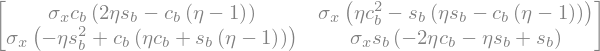

In [112]:
sigma_beta_ij_sim_ = sp.simplify(sigma_beta_ij)
sigma_beta_ij_sim_

In [113]:
K_I = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[0,0]
K_II  = sp.sqrt(sp.pi * a) * sigma_beta_ij_sim_[1,0]
K_I, K_II

In [114]:
Norm_K_I = K_I / K_Ic
Norm_K_I_ = Norm_K_I.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
Norm_K_I_

In [115]:
get_Norm_K_I = sp.lambdify((eta, beta), Norm_K_I_, 'numpy')
get_Norm_K_I

<function _lambdifygenerated(Dummy_229, Dummy_230)>

In [163]:
Norm_K_II = K_II / K_Ic
Norm_K_II_ = (Norm_K_II.subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
Norm_K_II_

In [164]:
get_Norm_K_II = sp.lambdify((eta, beta), Norm_K_II_, 'numpy')
get_Norm_K_II

<function _lambdifygenerated(Dummy_251, Dummy_252)>

<IPython.core.display.Javascript object>


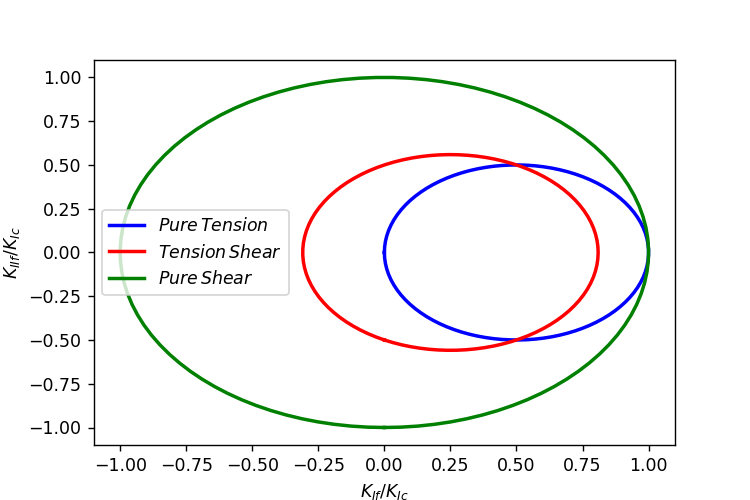

In [165]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(-90 * np.pi/180, 90 * np.pi/180, 100)
K_I_K_Ic = get_Norm_K_I(eta_0, beta_)
K_II_K_Ic = get_Norm_K_II(eta_0, beta_)
K_I_K_Ic_ts = get_Norm_K_I(eta_05, beta_)
K_II_K_Ic_ts = get_Norm_K_II(eta_05, beta_)
K_I_K_Ic_ps = get_Norm_K_I(eta_1, beta_)
K_II_K_Ic_ps = get_Norm_K_II(eta_1, beta_)
ax1.plot(K_I_K_Ic, K_II_K_Ic, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(K_I_K_Ic_ts, K_II_K_Ic_ts, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(K_I_K_Ic_ps, K_II_K_Ic_ps, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$K_{If}/K_{Ic}$'); ax1.set_ylabel(r'$K_{IIf}/K_{Ic}$')
ax1.legend()
_.savefig("Failurelocus.pdf", bbox_inches='tight')

## Variation Of SIFs against $\beta$

In [143]:
params = {sigma_x : 1, a : 1}
K_I_ = K_I.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta))
K_I_

In [153]:
K_II_ = (K_II.subs(params).subs(s_b, sp.sin(beta)).subs(c_b, sp.cos(beta)))
K_II_

In [154]:
get_K_I = sp.lambdify((eta, beta), K_I_, 'numpy')
get_K_I

<function _lambdifygenerated(Dummy_247, Dummy_248)>

In [155]:
get_K_II = sp.lambdify((eta, beta), K_II_, 'numpy')
get_K_II

<function _lambdifygenerated(Dummy_249, Dummy_250)>

<IPython.core.display.Javascript object>


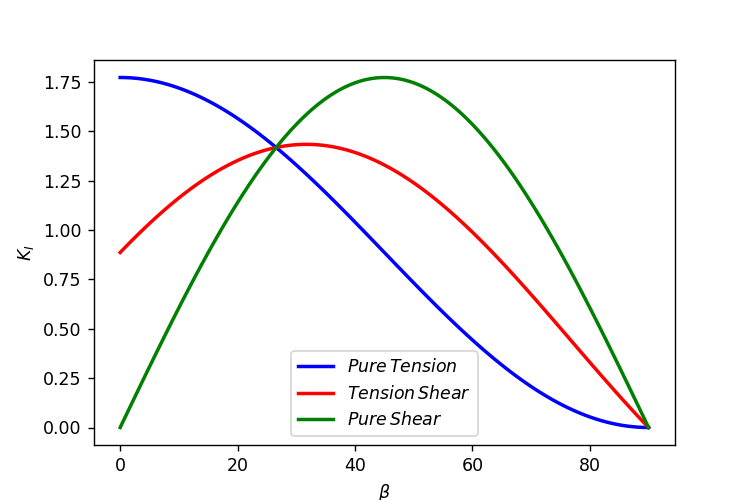

In [166]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_I_pt = get_K_I(eta_0, beta_)
K_I_ts = get_K_I(eta_05, beta_)
K_I_ps = get_K_I(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_I_pt, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(beta_ * 180/np.pi, K_I_ts, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ * 180/np.pi, K_I_ps, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{I}$')
ax1.legend()
_.savefig("KIbeta.pdf", bbox_inches='tight')

<IPython.core.display.Javascript object>


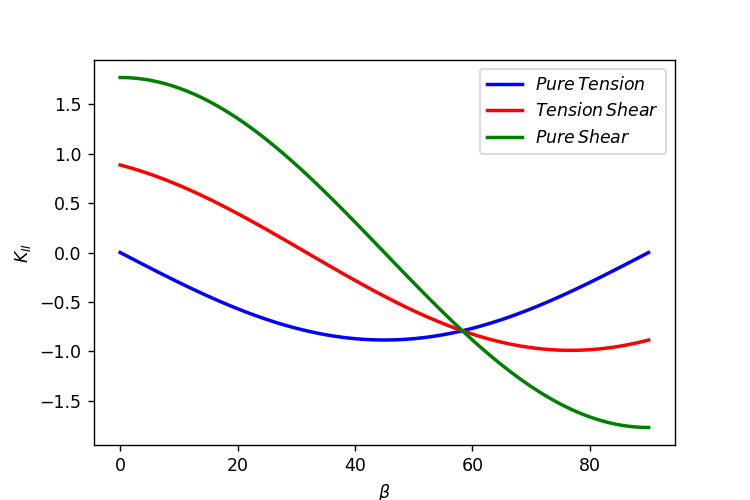

In [167]:
_, (ax1) = plt.subplots(1, 1, figsize=(6,4))
eta_0 = 0
eta_05 = 0.5
eta_1 = 1
beta_ = np.linspace(0, 90 * np.pi/180, 100)
K_II_pt = get_K_II(eta_0, beta_)
K_II_ts = get_K_II(eta_05, beta_)
K_II_ps = get_K_II(eta_1, beta_)
ax1.plot(beta_ * 180/np.pi, K_II_pt, color='blue', lw=2, label = r'$Pure\,Tension$')
ax1.plot(beta_ * 180/np.pi, K_II_ts, color='red', lw=2, label = r'$Tension\,Shear$')
ax1.plot(beta_ * 180/np.pi, K_II_ps, color='green', lw=2, label = r'$Pure\,Shear$')
ax1.set_xlabel(r'$\beta$'); ax1.set_ylabel(r'$K_{II}$')
ax1.legend()
_.savefig("KIIbeta.pdf", bbox_inches='tight')

## R-Curve
The fracture of quasi-brittle materials can be depicted by an R-curve which is also termed as fracture resistance. R-Curve is an envelope of energy release rate. For quasi-brittle materials, R is an increasing and convex function. This curve may be dependent on specimen geometry and material. 
A figure shown below highlights that the convex envelope of R-curve serves as the limit for crack gorwth, beyond which the unstable crack grows.


<img src="Rcurve.png" width="500"/>

For an infinite size specimen, the energy release rate is given by:
\begin{gather*}
G = \frac{\sigma^2 \pi a f_1^2}{E}
\end{gather*}
where, $\sigma = \frac{Ps}{b^2}$ for three point bending beam, $a$, $E$ represent the crack length and the modulus of elasticity respectively. The term $f_1$ in $\alpha$ equation is a geometry factor for the stress intensity factor and its value is equal to 1.123 for three point beam.

In [ ]:
f_1 = sp.Symbol('f_1', nonnegative = True)
f_2 = sp.Symbol('f_2', nonnegative = True)
E = sp.Symbol('E', nonnegative = True)
alpha = sp.Symbol('alpha', nonnegative = True)
a_0 = sp.Symbol('a_0', nonnegative = True)
a_c = sp.Symbol('a_c', nonnegative = True)
pi = sp.Symbol(r'\pi', nonnegative = True)
D = sp.Symbol('D', nonnegative = True)
H_0 = sp.Symbol('H_0', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
P_max = sp.Symbol('P_max', nonnegative = True)
P = sp.Symbol('P', nonnegative = True)
S = sp.Symbol('S', nonnegative = True)
B = sp.Symbol('B', nonnegative = True)
a = sp.Symbol('a', nonnegative = True)
COD = sp.Symbol('COD', nonnegative = True)
K_Ic = sp.Symbol('K_{Ic}', nonnegative = True)

In [ ]:
params = {f_2 : 1.42, 
          E: 28900, #N/mm2
          P_max : 10, #N 
          D : 19, #mm
          H_0 : 3, #mm
          B : 76.2, #mm
          S : 304.8, #mm
          P : 120, #N
          pi : 3.14, 
          a_0: 16, #mm
          f_1: 1.123,
          COD : 0.0094, ##mm
          K_Ic : 26.3 #N/mm2
         }

In [ ]:
sigma_x = (P * S) / B**2
sigma_x_ = sigma_x.subs(params)
sigma_x_

In [ ]:
G = (sigma_x_ * pi * a * f_1**2)/E
G

In [ ]:
G_ = G.subs(params)
G_

In [ ]:
get_G = sp.lambdify((a), G_, 'numpy')
get_G

With reference to Shah, the Crack Mouth Opening Displacement can be calculated as follows:
\begin{gather*}
CMOD = \frac{4 \sigma f_2}{E}
\end{gather*}

In [ ]:
CMOD = (4 * sigma_x.subs(params) * f_2.subs(params)) / E.subs(params)
CMOD

For the case, when critical crack mouth opening displacement $CMOD_c$ is known from experiment, the crack opening displacement $COD$ can be obtained from the equation given by Jenq and Shah:
\begin{gather*}
COD = CMOD_c\left[\left(1 - \frac{a_0}{a}\right)^2 + \left(1.081 - 1.149 \left(\frac{a}{D}\right)\right)\left[\frac{a_0}{a} - \left(\frac{a_0}{a}\right)^2\right]\right]^{1/2} 
\end{gather*}
In order to obtain the $COD_c$ at the tip of the crack we will replace $x$ with $a_0$. 

In [ ]:
#COD = CMOD * sp.sqrt((1 - a_0/a)**2 + (1.081 - 1.149*(a/D))*(a_0/a - (a_0/a)**2))
#COD_ = COD.subs(params)
#a_ = alpha * a_0
#COD_a = COD_.subs(a, a_)
#COD_a

In order to obtain R-Curve the following equation is to be evaluated:
\begin{gather*}
R = \beta_2 \psi (a - a_0)^{d_{2}}
\end{gather*}
The value of $\psi$ is normally close to one, hence it can be ignored whereas to calculate factor $\beta_2$ two critical conditions have to be considered i.e. $K_I = K_{IC}$ and $COD = CTOD_c$. Therefore, with reference to Maximum Tangential Stress Criterion $K_{IC}$ will be calculated as:
\begin{gather*}
K_{Ic} = \sigma_x \sqrt{\pi a}
\end{gather*}

In [ ]:
#K_Ic = sigma_x_ * sp.sqrt( sp.pi * a)
#K_Ic_ = K_Ic.subs(a, a_)
#K_Ic_

With reference to Shah, the value of $\beta_2$ can be calculated as:
\begin{gather*}
\beta_2 = \frac {K_{Ic}^2 (\alpha a_0 - a_0)^{-d_2}}{E \left(1 - \frac{d_2 - \frac{\alpha - 1}{\alpha}}{d_1 - \frac{\alpha - 1}{\alpha}} \right)}
\end{gather*}
and the unknown terms $\alpha$, $d_{1,2}$ in the above equation can be obtained from:
\begin{gather*}
\alpha = \frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + \sqrt {\frac {\pi E^2 f_1^2 CTOD_c^2}{32 a_0 K_{Ic}^2 f_2^2} + 1} \\
d_{1,2} = \frac{1}{2} + \frac{\alpha - 1} {\alpha} \pm \sqrt{\left(\frac{1}{4} + \frac{\alpha - 1} {\alpha} - \left(\frac{\alpha - 1} {\alpha}\right)^2\right)}
\end{gather*}
where, $f_2$ is a geometry parameter ad is equal to 1.42 for three point bend beam. $\alpha$ is the precritical stable crack growth ($\alpha \geq 1$). It is equal to 1 for a pure brittle material whereas it is greater than 1 for quasi-brittle materials. 

In [ ]:
alpha = (pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) \
        + sp.sqrt((pi * E**2 * f_1**2 * COD**2) / (32 * a_0 * K_Ic**2 * f_2**2) + 1)
alpha_ = sp.simplify(alpha.subs(params))
alpha_

In [ ]:
d_1 = (1/2) + ((alpha_ - 1) / alpha_) + sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_2 = (1/2) + ((alpha_ - 1) / alpha_) - sp.sqrt(1/4 + (alpha_ - 1) / alpha_ - ((alpha_ - 1) / alpha_)**2)
d_1_ = d_1.subs(params)
d_2_ = d_2.subs(params)
d_2_, d_1_

In [ ]:
#get_d_1 = sp.lambdify((a), d_1_, 'numpy')
#get_d_1

In [ ]:
#get_d_2 = sp.lambdify((a), d_2_, 'numpy')
#get_d_2

In [ ]:
beta_2 = (K_Ic**2 * (alpha_ * a_0 - a_0)**-d_2) / (E * (1 - (d_2 - ((alpha_-1)/alpha_))/(d_1 - ((alpha_-1)/alpha_))))
beta_2_ = beta_2.subs(params)
beta_2_

In [ ]:
#get_beta_2 = sp.lambdify((a), beta_2_, 'numpy')
#get_beta_2

In [ ]:
R = beta_2_ * (a - a_0)**d_2
R_ = R.subs(params)
#sp.simplify(R_)
R_

In [ ]:
get_R = sp.lambdify((a), R_, 'numpy')
get_R

The value of R must not exceed its maximum value which is:
\begin{gather*}
R_{Ic} = \frac{K_{Ic}^2}{E}
\end{gather*}

In [ ]:
R_Ic = (K_Ic)**2 / E
#R_Ic_ =R_Ic.subs(a, a_c_).subs(params)
R_Ic_ = R_Ic.subs(params)
R_Ic_

In [ ]:
#get_R_Ic = sp.lambdify((s_b), R_Ic_, 'numpy')
#get_R_Ic

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(7,3))
a = np.linspace(16, 100, 100)
a_g = np.linspace(0, 100, 100)
R = get_R(a) 
#R_I_c = R_Ic_
G = get_G(a_g)
ax1.plot(a , R, color='orange', lw=2, label= 'R-curve')
ax1.plot(a_g , G, color='blue', lw=2, label= 'G')
#ax1.plot(a , R_I_c, color='yellow', lw=2)
ax1.set_xlabel(r'$a$'); ax1.set_ylabel(r'$G$')
ax1.legend()

In [ ]:
R

In [ ]:
G